# K-means 

## K-Means from Scratch

    1.Initialization of Centroids:
        Randomly select k data points as initial centroids.

    2.Assignment of Data Points to Clusters:
        Calculate distances between data points and centroids.
        Assign each data point to the cluster with the nearest centroid.

    3.Update Centroids:
        Update centroids based on the mean of data points in each cluster.

    4.Repeat Steps 2 and 3:
        Iteratively update assignments and centroids until convergence.

    5.Visualization:
        Visualize the clustered data points and final centroids.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


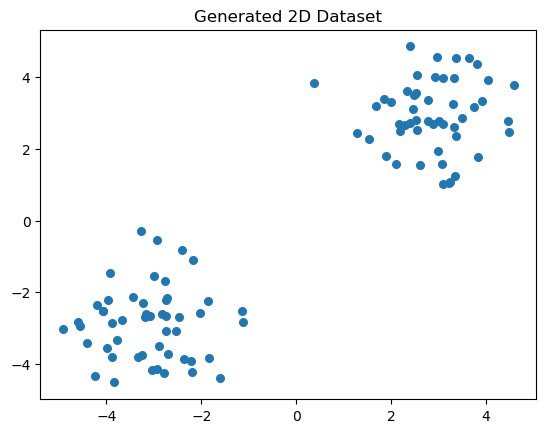

In [2]:
# Generate a 2D dataset with two clusters
np.random.seed(42)

# Cluster 1
cluster1 = np.random.randn(50, 2) + np.array([3, 3])

# Cluster 2
cluster2 = np.random.randn(50, 2) + np.array([-3, -3])

# Combine clusters
data = np.vstack([cluster1, cluster2])

# Visualize the dataset
plt.scatter(data[:, 0], data[:, 1], s=30)
plt.title('Generated 2D Dataset')
plt.show()

In [3]:
def initialize_centroids(k, data):
    # Randomly choose k data points as initial centroids
    indices = np.random.choice(len(data), k, replace=False)
    centroids = data[indices]
    return centroids

def assign_to_clusters(data, centroids):
    # Assign each data point to the nearest centroid
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(data, cluster_assignments, k, method='mean'):
    # Update centroids based on mean or median of data points in each cluster
    if method == 'mean':
        centroids = np.array([np.mean(data[cluster_assignments == i], axis=0) for i in range(k)])
    elif method == 'median':
        centroids = np.array([np.median(data[cluster_assignments == i], axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iters=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(k, data)

    for _ in range(max_iters):
        # Step 2: Assign data points to clusters
        cluster_assignments = assign_to_clusters(data, centroids)

        # Step 3: Update centroids using mean
        new_centroids = update_centroids(data, cluster_assignments, k, method='mean')

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assignments

def k_medians(data, k, max_iters=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(k, data)

    for _ in range(max_iters):
        # Step 2: Assign data points to clusters
        cluster_assignments = assign_to_clusters(data, centroids)

        # Step 3: Update centroids using median
        new_centroids = update_centroids(data, cluster_assignments, k, method='median')

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assignments

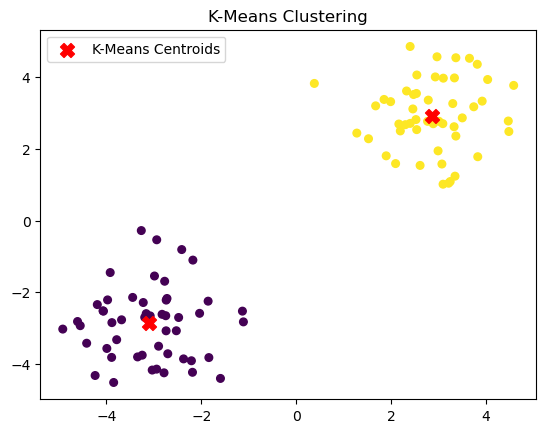

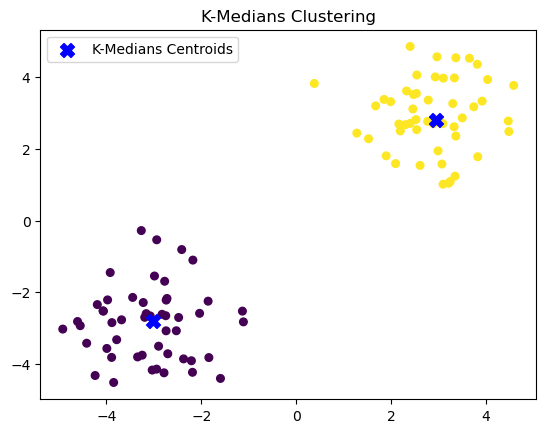

In [4]:
# Generate a 2D dataset with two clusters
np.random.seed(42)
cluster1 = np.random.randn(50, 2) + np.array([3, 3])
cluster2 = np.random.randn(50, 2) + np.array([-3, -3])
data = np.vstack([cluster1, cluster2])

# Applying K-Means with k=2
k_means_centroids, k_means_assignments = k_means(data, 2)

# Applying K-Medians with k=2
k_medians_centroids, k_medians_assignments = k_medians(data, 2)

# Visualize the clusters for K-Means
plt.scatter(data[:, 0], data[:, 1], c=k_means_assignments, cmap='viridis', s=30)
plt.scatter(k_means_centroids[:, 0], k_means_centroids[:, 1], c='red', marker='X', s=100, label='K-Means Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Visualize the clusters for K-Medians
plt.scatter(data[:, 0], data[:, 1], c=k_medians_assignments, cmap='viridis', s=30)
plt.scatter(k_medians_centroids[:, 0], k_medians_centroids[:, 1], c='blue', marker='X', s=100, label='K-Medians Centroids')
plt.title('K-Medians Clustering')
plt.legend()
plt.show()

### Silhouette Score

It quantifies how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [5]:
from sklearn.metrics import silhouette_score

def compute_silhouette_score(data, cluster_assignments):
    n = len(data)
    silhouette_scores = np.zeros(n)

    for i in range(n):
        # Calculate a(i): average distance to other points in the same cluster
        cluster_idx = cluster_assignments[i]
        a_i = np.mean(np.linalg.norm(data[cluster_assignments == cluster_idx] - data[i], axis=1))

        # Calculate b(i): smallest average distance to points in a different cluster
        other_clusters = np.unique(cluster_assignments[cluster_assignments != cluster_idx])
        b_i_values = [np.mean(np.linalg.norm(data[cluster_assignments == other_cluster] - data[i], axis=1)) for other_cluster in other_clusters]
        b_i = np.min(b_i_values)

        # Calculate silhouette score for data point i
        silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)

    # Overall silhouette score is the average over all data points
    overall_silhouette = np.mean(silhouette_scores)
    return overall_silhouette

# Compute silhouette score for K-Means clustering
k_means_silhouette = compute_silhouette_score(data, k_means_assignments)
print(f"Silhouette Score for K-Means: {k_means_silhouette}")

# Compute the silhouette score for K-Means clustering using sklearn
k_means_silhouette = silhouette_score(data, k_means_assignments)
print(f"Silhouette Score for K-Means: {k_means_silhouette}")

# Compute the silhouette score for K-Medians clustering using sklearn
k_medians_silhouette = silhouette_score(data, k_medians_assignments)
print(f"Silhouette Score for K-Medians: {k_medians_silhouette}")

Silhouette Score for K-Means: 0.8022691602422991
Silhouette Score for K-Means: 0.7982338369819375
Silhouette Score for K-Medians: 0.7982338369819375


## K-Means IRIS

In [6]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import math

sns.set(style="ticks", color_codes=True, palette="husl")
%matplotlib inline

### Exploratory Data Analysis

In [8]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()
print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#load it into a dataframe
df = pd.DataFrame(data=iris.data)
df['Class'] = iris.target
df['Species'] = iris.target_names[iris.target]
df.head()

,0,1,2,3,Class,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
X = iris.data[:, :4]
y = iris.target

### Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

When <code>n_init='auto'</code>, the number of runs will be 10 if using <code>init='random'</code>, and 1 if using <code>init='kmeans++'</code>.

In [12]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

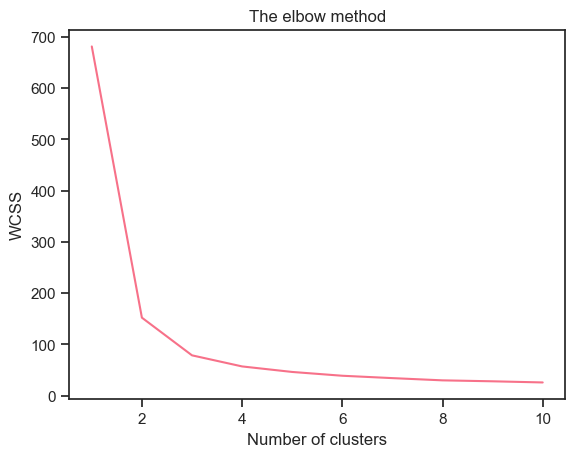

In [13]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

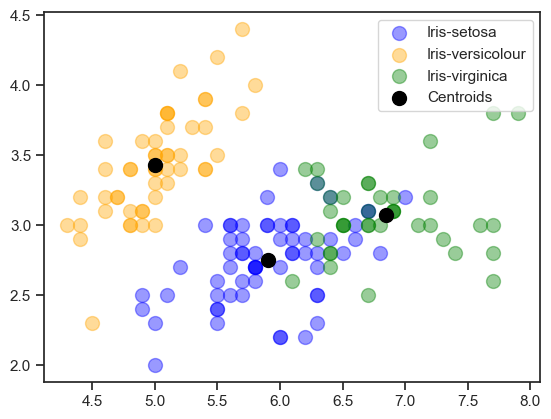

In [15]:
#Visualise the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, alpha=.4, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, alpha=.4, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, alpha=.4, c = 'green', label = 'Iris-virginica')

#Plot clusters centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

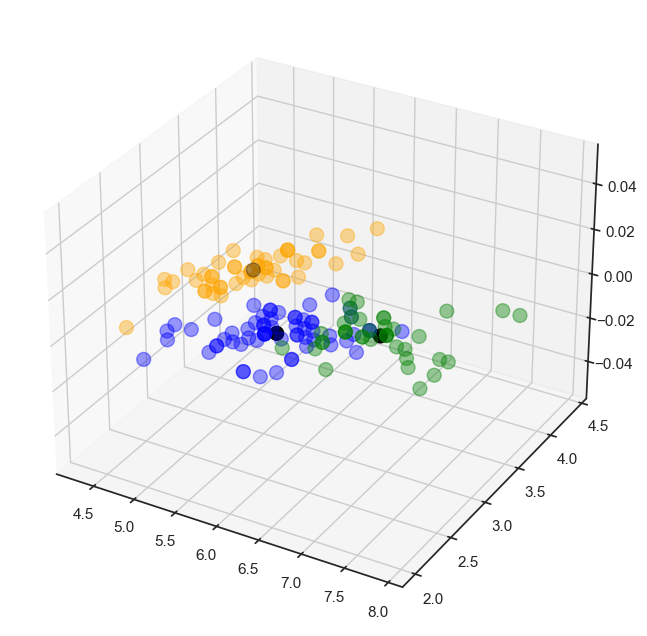

In [16]:
# 3d scatterplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, alpha=.4, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, alpha=.4, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, alpha=.4, c = 'green', label = 'Iris-virginica')

#Plot clusters centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()

#### Yellowbrick Package

In [17]:
#!pip install yellowbrick  
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

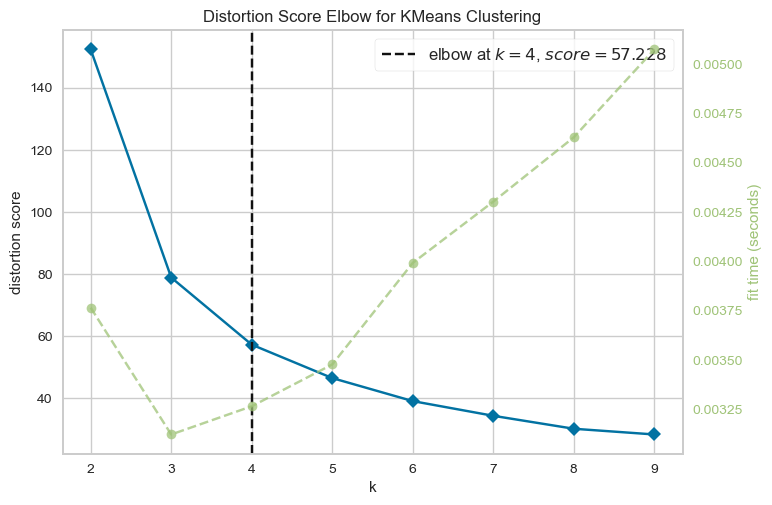

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

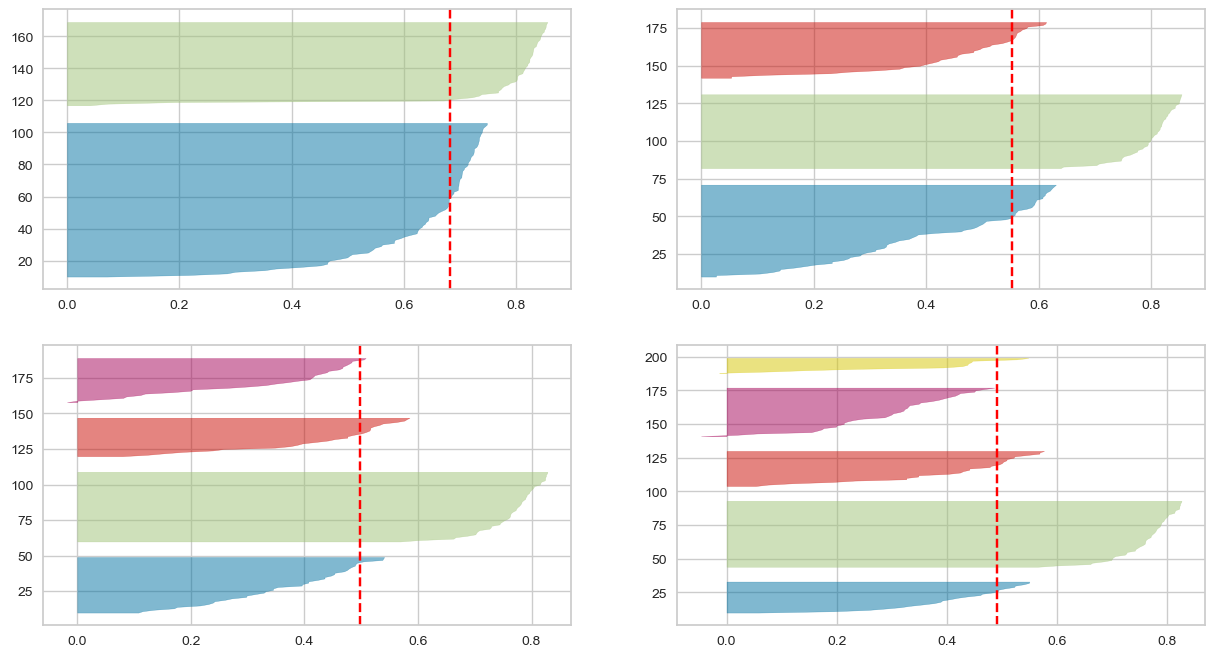

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 